In [1]:
import pandas as pd
data = pd.read_csv('p1_iris.csv', header=None)
train = data.sample(round(len(data)*.1))
test = data.drop(train.index).reset_index(drop=True)
train = train.reset_index(drop=True)
test

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
130,6.7,3.3,5.7,2.5,Iris-virginica
131,6.7,3.0,5.2,2.3,Iris-virginica
132,6.3,2.5,5.0,1.9,Iris-virginica
133,6.5,3.0,5.2,2.0,Iris-virginica


Trying to see what the category had the largest distinction between the means by taking the mean of each type of flower. Then run a cross-tabulation of the ones that had the most difference. 

In [ ]:
data[data[4] == 'Iris-versicolor'].mean(axis=0)
data[data[4] == 'Iris-virginica'].mean(axis=0)
data[data[4] == 'Iris-setosa'].mean(axis=0)

Columns 2 and 3 had the most variation between the three types of flowers so now I'm running a cross tabulation to see if either would work. 

In [35]:
pd.crosstab([data[3]], data[4])

4,Iris-setosa,Iris-versicolor,Iris-virginica
3,,,
0.1,6,0,0
0.2,28,0,0
0.3,7,0,0
0.4,7,0,0
0.5,1,0,0
0.6,1,0,0
1.0,0,7,0
1.1,0,3,0
1.2,0,5,0


The following cell is to train the decision tree on the entire dataset.

In [46]:
from sklearn import tree
Y = data[4]
X = data.drop([4],axis=1)
clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)
clf = clf.fit(X, Y)


The following cell trains the decision tree on the training dataset. 

In [113]:
from sklearn import tree
Y = train[4]
X = train.drop([4],axis=1)
clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)
clf = clf.fit(X, Y)

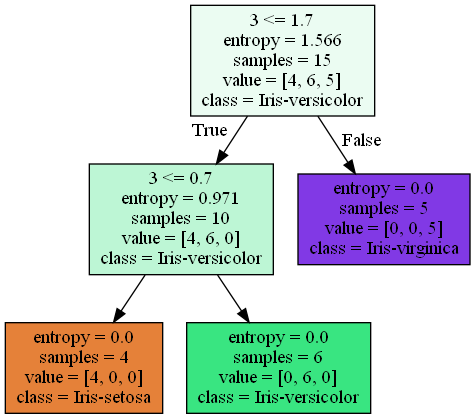

In [114]:
import pydotplus
from IPython.display import Image
dot_data = tree.export_graphviz(clf, feature_names=X.columns, class_names=['Iris-setosa','Iris-versicolor','Iris-virginica'], filled=True, out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())


In [115]:
testY = test[4]
testX = test.drop([4],axis=1)
predY = clf.predict(testX)

predictions = pd.concat([testY ,pd.Series(predY,name='Predicted Class')], axis=1)
predictions

,4,Predicted Class
0,Iris-setosa,Iris-setosa
1,Iris-setosa,Iris-setosa
2,Iris-setosa,Iris-setosa
3,Iris-setosa,Iris-setosa
4,Iris-setosa,Iris-setosa
...,...,...
130,Iris-virginica,Iris-virginica
131,Iris-virginica,Iris-virginica
132,Iris-virginica,Iris-virginica
133,Iris-virginica,Iris-virginica


In [116]:
from sklearn.metrics import accuracy_score
print('Accuracy on test data is %.2f' % (accuracy_score(testY, predY)))

Accuracy on test data is 0.96


Overall, the first exercise helped me to understand how to split a pandas dataframe into training data and testing data. Through experimenting with different splits of the data, I found that the best training split was 10% training and 90% testing. When the split was lower than 5% for training the amount of randomness in the guesses increased and the accuracy score dropped to around 50%-60%. It was interesting to me that by looking at the means, I could visually verify the splits in the data. I have a feeling that if the size of the dataset were to be increased I would need to find a better method as trying to look for splits with a higher number of variables could become quite tedious.  

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
data = pd.read_csv('p1_credit_data.csv')
data = data.drop('ID', axis=1)
data.groupby('Rating').mean()

,WC_TA,RE_TA,EBIT_TA,MVE_BVTD,S_TA,Industry
Rating,,,,,,
A,0.186911,0.322590,0.058837,1.827097,0.328040,6.582609
AA,0.218304,0.395281,0.062390,2.698501,0.408013,6.355844
AAA,0.306759,0.592202,0.075445,7.271379,0.662560,6.372414
B,-0.004247,-0.126550,0.029762,0.351594,0.143775,6.365625
BB,0.074024,0.078773,0.043400,0.598366,0.177581,6.425027
BBB,0.141806,0.217885,0.053185,1.083015,0.248696,6.273892
CCC,-0.209169,-0.916400,-0.020146,0.169654,0.113492,6.446154


Visual analysis of the means show that MVE_BVTD and WC_TA would have the best discrimation between categories, followed by S_TA.

The following cell attempts to find optimal values for what the depth should be for the decision tree, as well as what the split of training data should be. This of course is a very brute force way of finding what these values should be and in practice there is likely a much better way of accomplishing this task. 

The logic is that the data is split in increments of 5% up to a total of 80% and then a decision tree is built based on a set of pre-defined depths to see what could be a good amount of training data and what the depth of the tree should be. I chose to stay under 80% of a data split as I believe that using more than that could be potentially overfitting the model to this dataset. After running it multiple times I found that the best parameters for the model are as follows:

% Training Data => 25

Tree Max Depth => 5


In [373]:
from sklearn.metrics import accuracy_score
from sklearn import tree
percent = 0
current_acc = 0
best_params = []
depths = [3,4, 5,6,7,8,10,12,15,20]

for i in range(16):
    percent += .05
    train = data.sample(round(len(data)*percent))
    test = data.drop(train.index).reset_index(drop=True)
    train = train.reset_index(drop=True)

    for depth in depths: 
        Y = train['Rating']
        X = train.drop(['Rating'],axis=1)
        clf = tree.DecisionTreeClassifier(criterion='gini',max_depth=depth, class_weight='balanced')
        clf = clf.fit(X, Y)
        testY = test['Rating']
        testX = test.drop(['Rating'],axis=1)
        predY = clf.predict(testX)
        predictions = pd.concat([testY ,pd.Series(predY,name='Predicted Class')], axis=1)
        acc = accuracy_score(testY, predY)
        if acc > current_acc:
            current_acc = acc
            best_params.append((percent, acc, depth))

for row in best_params:
    print('{:0.0f}% training data {:0.2f}% accuracy {:0.0f} depth'.format(row[0]*100,row[1]*100,row[2]))

5% training data 48.38% accuracy 3 depth
5% training data 65.57% accuracy 4 depth
5% training data 66.37% accuracy 5 depth
10% training data 66.60% accuracy 4 depth
10% training data 67.65% accuracy 5 depth
15% training data 68.34% accuracy 4 depth
15% training data 68.43% accuracy 5 depth
20% training data 68.91% accuracy 7 depth
25% training data 71.18% accuracy 3 depth
25% training data 71.31% accuracy 5 depth
30% training data 72.71% accuracy 5 depth
75% training data 74.97% accuracy 6 depth


The following cell creates a model built with the parameters that were found with the brute force appproach above with another random sample of the dataset. It then launches a new window to show a picture with the decision tree that was built. I chose to do this because it would allow me to more closely examine the tree and save it if I wanted to. 

In [3]:
import pydotplus
import PIL.Image as Image
import io
from sklearn import tree

train = data.sample(round(len(data)*.25))
test = data.drop(train.index).reset_index(drop=True)
train = train.reset_index(drop=True)


Y = train['Rating']
X = train.drop(['Rating'],axis=1)
clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=5)
clf = clf.fit(X, Y)
dot_data = tree.export_graphviz(clf, feature_names=X.columns, class_names=list(train['Rating'].unique()), filled=True, out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)

# used this library instead so I could open the image larger 
img = Image.open(io.BytesIO(graph.create_png()))
img.show()

The following cell test the trained model on the testing data and prints the accuracy along with the predictions. 

In [4]:
testY = test['Rating']
testX = test.drop(['Rating'],axis=1)
predY = clf.predict(testX)

from sklearn.metrics import accuracy_score
print('Accuracy on test data is %.2f' % (accuracy_score(testY, predY)))

predictions = pd.concat([testY ,pd.Series(predY,name='Predicted Class')], axis=1)
predictions


Accuracy on test data is 0.71


,Rating,Predicted Class
0,BB,BB
1,A,A
2,A,A
3,BBB,BBB
4,AAA,AAA
...,...,...
2944,AA,AA
2945,BBB,BBB
2946,BBB,BBB
2947,BB,BB


In the following cell I tried another approach of using a classification tree, by using a random forest. I reserved 10% of the data for testing and trained the model on the remainder of the data. With this method, I was able to achieve the highest accuracy of any of my experiments ranging from 70-80% accuarcy on the reserved data.

In [25]:
from sklearn.ensemble import RandomForestClassifier

test_data = data.sample(frac=.10) #save 10% of data for testing
train = data.drop(test_data.index).reset_index(drop=True) #remove the training data 
test_data = test_data.reset_index(drop=True) 
train = train.sample(frac=1) #shuffle the testing data

Y = train['Rating']
X = train.drop(['Rating'],axis=1)
clf = RandomForestClassifier(n_estimators=100, criterion='entropy', warm_start=True) #use the average of 100 trees 

clf = clf.fit(X, Y)

testY = test_data['Rating']
testX = test_data.drop(['Rating'],axis=1)
predY = clf.predict(testX)

predictions = pd.concat([testY ,pd.Series(predY,name='Predicted Class')], axis=1)
from sklearn.metrics import accuracy_score
print('Accuracy on test data is %.2f' % (accuracy_score(testY, predY)))

Accuracy on test data is 0.78


In the following block, I tried to seperate the data into chunks and train a random forest tree classifier with each chunk. I first reserved 10% of the data to test the model after all of the training was complete. I then looped through each chunk of the data and trained on 1/nth of the data and tested on n-1/n of the remaining data splits. On each iteration of the training, I print the overall accuracy of the model. I found that initializing the model with 100 estimators and keeping the total depth of the model to 8 nodes deep produced the best accuracy for the final model. Without explicitly declaring the maximum depth, I believe that the model was becoming over fitted. With these parameters, I was able to get an average accuracy of around 75% on the reserved training data. 

After running it several times, I noticed that the accuracy of the model increased every time the model trained on the training splits but the final accuracy of the model did not increase. 

In [48]:
import pydotplus
import PIL.Image as Image
import io
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# reserve 10 % for testing 
test_data = data.sample(frac=.1)

train = data.drop(test_data.index).reset_index(drop=True)
train = train.sample(frac=1) #this is just to shuffle the remaining data more

num_sets = 3 # split the remaining data into num_sets 
training_sets = [] 
for g, df in train.groupby(np.arange(len(train)) // (len(train)/num_sets)):
    training_sets.append(df)


clf = RandomForestClassifier(n_estimators=100, criterion='gini', warm_start=True, max_depth=8) #init the model 

splits = [[j for j in range(len(training_sets)) if j != i] for i in range(len(training_sets))] # make the splits for training vs testing

# train on outer loop, test against the rest
for i in range(len(training_sets)):
    Y = training_sets[i]['Rating']
    X = training_sets[i].drop(['Rating'],axis=1)
    clf = clf.fit(X, Y)
    test_df = pd.DataFrame(columns=training_sets[i].columns)
    clf.n_estimators += 10
    # build the testing dataset
    for j in splits[i]:
        test_df =test_df.append(training_sets[j])

    testY = test_df['Rating']
    testX = test_df.drop(['Rating'],axis=1)
    predY = clf.predict(testX)
    print('Accuracy on test data is {:.2f}%'.format(accuracy_score(testY, predY)*100))


testY = test_data['Rating']
testX = test_data.drop(['Rating'],axis=1)
predY = clf.predict(testX)
print('Accuracy on the reserved data {:.2f}%'.format(accuracy_score(testY, predY)*100))
# grab one of the trees to visualize 
estimator = clf.estimators_[-1]
dot_data = tree.export_graphviz(estimator, feature_names=X.columns, class_names=list(train['Rating'].unique()), filled=True, out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)

# used this library instead so I could open the image larger 
img = Image.open(io.BytesIO(graph.create_png()))
img.show()

Accuracy on test data is 73.89%
Accuracy on test data is 80.92%
Accuracy on test data is 83.26%
Accuracy on the reserved data 76.08%


Just as a final analysis, I believe there wasn't significant benefit from going through the hassle of splitting the data into separate chunks. The accuracy of a random forest model was higher when that model was just trained on all of the training data at once. I believe this is likely due to the fact that the model written for sklearn takes many random samples from the population to train. When the model is fed a larger sample to train from, it will be able to produce a more accurate final model. There may be an alternative route or other parameters of the model that could have been fine tuned to produce a higher accuarcy on the model, but I couldn't think of any. 